In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url1 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
df = pd.read_csv(url1, sep=',', index_col=0)
url2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
dw = pd.read_csv(url2, sep=',', index_col=0)
dweek = df

df.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


In [2]:
dw.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


1. Зависимость среднего времени задержки от месяца:

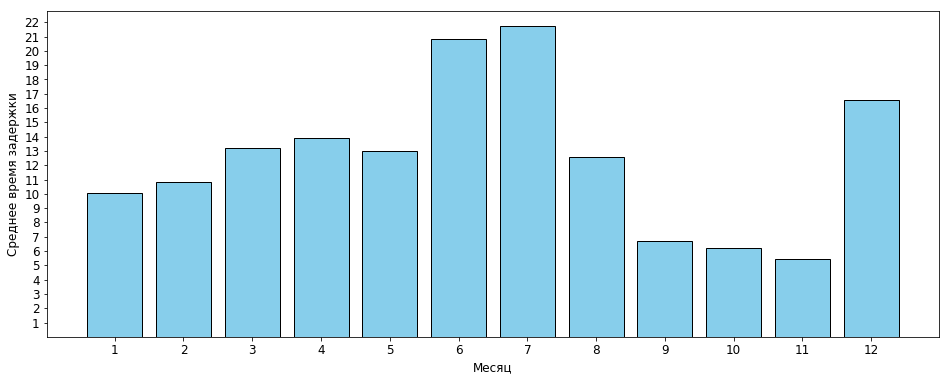

In [168]:
grouped_data = pd.DataFrame(df.groupby([df.month])['dep_delay'].mean().reset_index(name='mean_delay_dep'))
plt.figure(figsize = (16, 6))
plt.bar(grouped_data.month, grouped_data.mean_delay_dep, color='skyblue', edgecolor = 'black')
plt.xticks(range(1, 13))
plt.yticks(range(1, 23))
plt.ylabel('Среднее время задержки')
plt.xlabel('Месяц')
plt.show()

Вывод: Наибольшие задержки происходят в летний период (июнь и июль) в связи с отпусками и в декабре из-за предпраздничного периода. 
Необходимо добавить рейсы и персонал на это время.

2. Зависимость среднего времени задержки от дня недели:

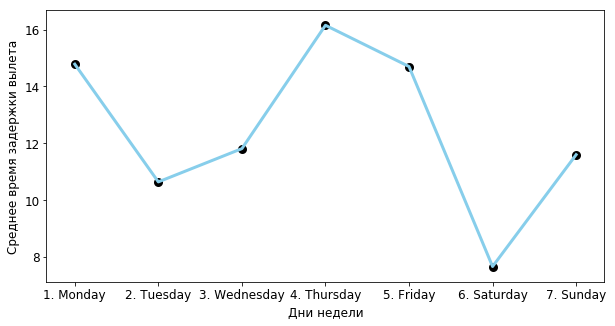

In [169]:
dweek['Date'] = dweek['year'].astype(str) + '-' + dweek['month'].astype(str) + '-' + dweek['day'].astype(str)
dweek['Date'] = pd.to_datetime(dweek['Date'])
dweek['day_w'] = dweek['Date'].dt.dayofweek
days = ["1. Monday", "2. Tuesday", "3. Wednesday", "4. Thursday", "5. Friday", "6. Saturday", "7. Sunday"]
dweek['day_w'] = dweek['day_w'].apply(lambda x: days[x])
grouped_data = pd.DataFrame(dweek.groupby([dweek.day_w])['dep_delay'].mean().reset_index(name='mean_delay_dep'))
plt.figure(figsize = (10, 5))
plt.plot(grouped_data.day_w, grouped_data.mean_delay_dep, c='skyblue', linewidth=3)
plt.scatter(grouped_data.day_w, grouped_data.mean_delay_dep, c='black', linewidth=3)
plt.xticks(range(0, 7))
plt.xlabel('Дни недели')
plt.ylabel('Среднее время задержки вылета')
plt.show()

Вывод: В понедельник происходят задержки рейсов из-за начала недели и несобранности, связанной отдыхом на выходных. 
Также средняя задежрка увеличивается в четверг и пятницу в связи с поездками на выходные домой или на небольшой отдых.
Необходимо добавить рейсы и персонал в эти дни. 

3. Зависимость среднего времени задержки от времени суток:

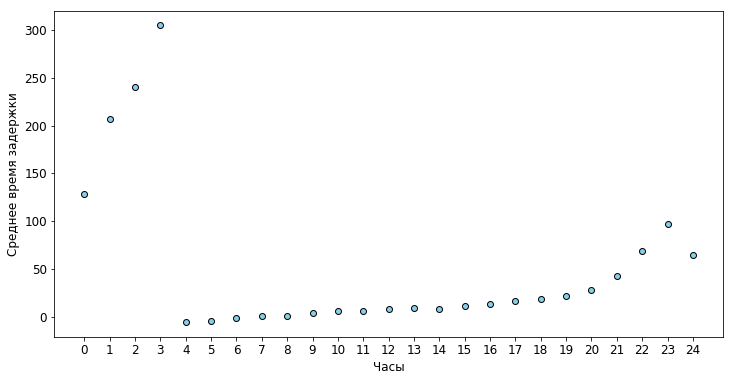

In [170]:
grouped_data = pd.DataFrame(df.groupby([df.hour])['dep_delay'].mean().reset_index(name='mean_delay_dep'))
plt.figure(figsize = (12, 6))
plt.scatter(grouped_data.hour, grouped_data.mean_delay_dep, color='skyblue', edgecolor = 'black')
plt.xticks(range(0, 25))
plt.ylabel('Среднее время задержки')
plt.xlabel('Часы')
plt.show()

Вывод: Задержки увеличиваются в ночное время, особенно в период 21:00 - 04:00.
Необходимо добавить рейсы и персонал в это время. 

4. Зависимость среднего времени задержки от аэропорта:

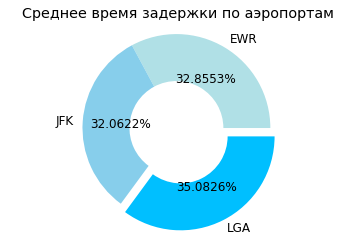

In [179]:
df4=df[['origin', 'dep_delay']]
df4 = df4[df4['dep_delay'] > 0]
colour = ['white', 'pink', 'red']
v1 = df4.groupby('origin').mean()
d = np.array(v1['dep_delay'])
explode = [0, 0, 0.1]
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(d, labels=v1.index, autopct='%1.4f%%',  wedgeprops=dict(width=0.5), colors = ['powderblue', 'skyblue', 'deepskyblue'], explode = explode)
ax1.axis('equal')
plt.title('Среднее время задержки по аэропортам')
plt.show()

Вывод: Лучше не покупать авиабилеты из аэропорта LGA тем, кто ценит свое время. 
А LGA стоит постараться уменьшить среднее время задержки.

5. Зависимость среднего времени задержки от авиакомпании:

Text(0,0.5,'Среднее время задержки')

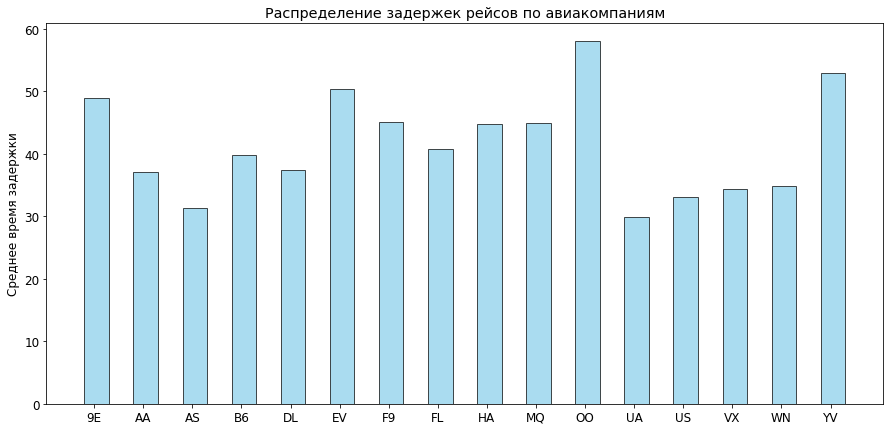

In [171]:
df5=df[['carrier', 'dep_delay']]
df5 = df5[df5['dep_delay'] > 0]
v5 = df5.groupby('carrier').mean()
a5 = np.array(v5['dep_delay'])
v5.head()
fig = plt.figure(figsize = (15, 7))
plt.rcParams.update({'font.size': 12})
plt.title('Распределение задержек рейсов по авиакомпаниям')
xs = range(len(v5.index))
plt.bar([x + 0.05 for x in xs], [t*1 for t in a5], width = 0.5, color = 'skyblue', alpha = 0.7, label = 'Среднее время задержки', edgecolor = 'black')
plt.xticks(xs, v5.index)
plt.ylabel('Среднее время задержки')

Вывод: Самая большая задержка у авиакомпании OO. ОО стоит постараться уменьшить среднее время задержки. 
Самые маленькие задержки у авиакомпаний UA, AS,US.

6. Зависимость среднего времени задержки от расстояния полетов:

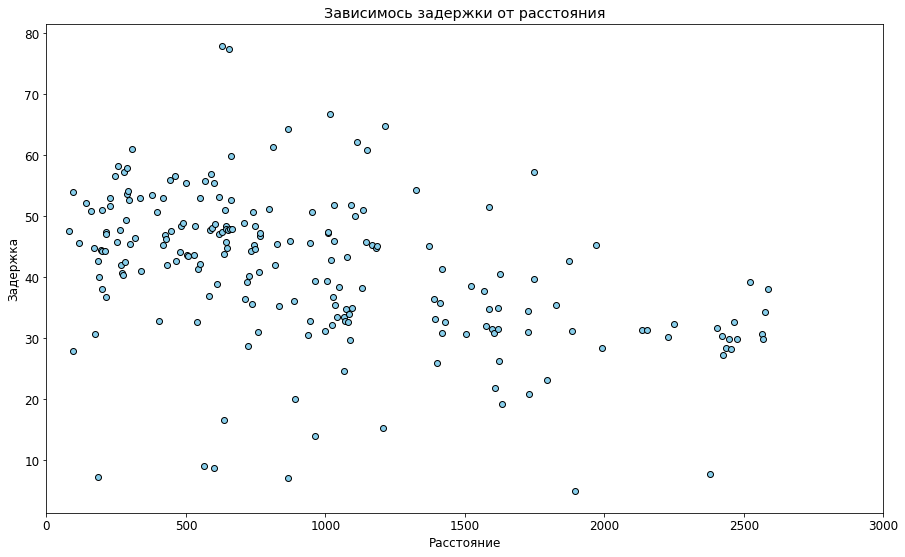

In [172]:
dfNew = df.copy()
dK=dfNew[['dep_delay','distance']]
dK = dK[dK['dep_delay'] > 0]
dK = dK.groupby('distance').mean()
A = np.array(dK['dep_delay'])
d6 = dK.index
plt.figure(figsize = (15, 9))
plt.scatter(d6, A, lw = 1, color = 'skyblue', edgecolor = 'black')
plt.title('Зависимось задержки от расстояния')
plt.xlabel('Расстояние')
plt.ylabel('Задержка')
plt.xlim(0, 3000)
plt.show()

Вывод: Чем длиннее расстояние полета, тем меньше задержка. 
Скорее всего это связано с тем, что к перелетам на большое расстояние относятся более ответственно.

7. Зависимость среднего времени задержки от температуры:

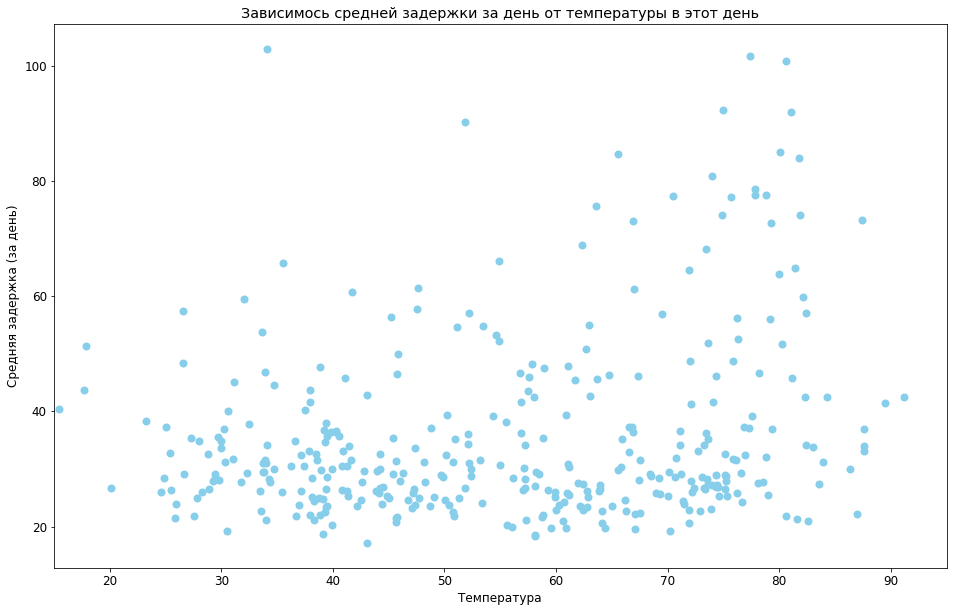

In [173]:
dL=dfNew[['dep_delay', 'year','month','day']]
dL = dL[dL['dep_delay'] > 0]
dL = dL.groupby([dL.year, dL.month, dL.day]).mean()
df1_1 = dw[['temp', 'year' ,'month','day']]
df1_1 = df1_1.groupby([df1_1.year, df1_1.month , df1_1.day]).mean()
mt = pd.merge(dL, df1_1, on = ['year','month','day'])
mt = mt.sort_values(by = 'temp')
amt = np.array(mt['dep_delay'])
bmt = np.array(mt['temp'])
plt.figure(figsize = (16, 10))
plt.scatter(bmt, amt, lw = 2, color = 'skyblue')
plt.title('Зависимось средней задержки за день от температуры в этот день')
plt.xlabel('Температура')
plt.ylabel('Средняя задержка (за день)')
plt.xlim(15, 95)
plt.show()

Вывод: Чем выше температура, тем больше средняя задержка.
Необходимо добавить рейсы и персонал в жаркие дни. 

8. Зависимость среднего времени задержки от давления и осадков:

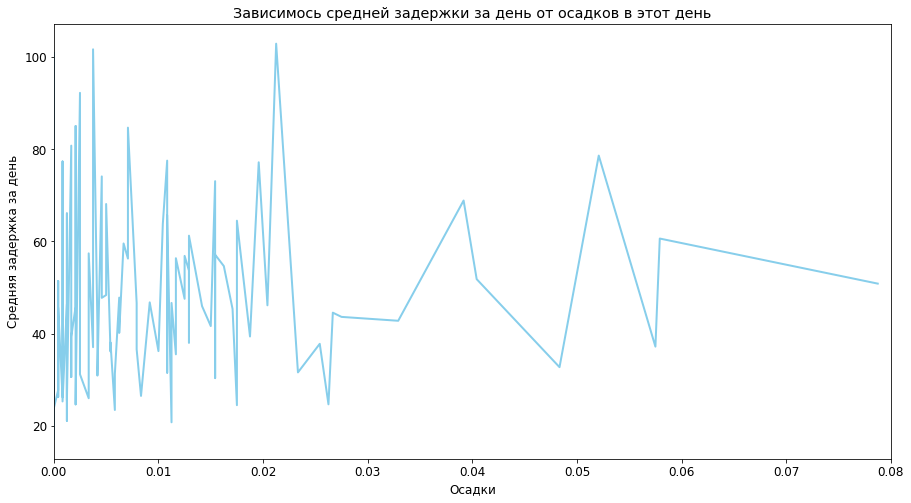

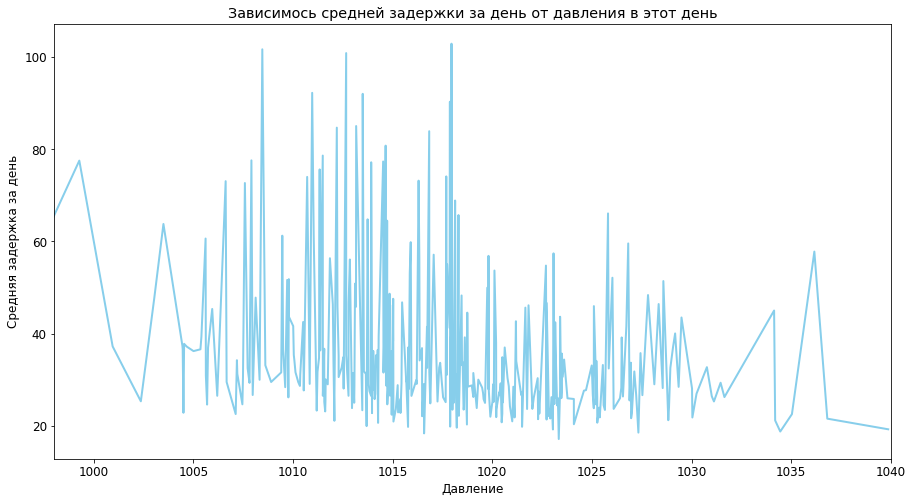

In [174]:
dD = dw[['precip', 'year' ,'month','day']]
dD = dD.groupby([dD.year, dD.month , dD.day]).mean()

df15 = dfNew[['dep_delay', 'year','month','day']]
df15 = df15[df15['dep_delay'] > 0]
df15 = df15.groupby([df15.year, df15.month, df15.day]).mean()

mt5 = pd.merge(df15, dD, on = ['year','month','day']).sort_values(by = 'precip')
a15 = np.array(mt5['dep_delay'])
b15 = np.array(mt5['precip'])

plt.figure(figsize = (15, 8))
plt.plot(b15, a15, lw = 2, color = 'skyblue')
plt.title('Зависимось средней задержки за день от осадков в этот день')
plt.xlabel('Осадки')
plt.ylabel('Средняя задержка за день')
plt.xlim(0, 0.08)
plt.show()

dD = dw[['pressure', 'year' ,'month','day']]
dD = dD.groupby([dD.year, dD.month , dD.day]).mean()

df15 = dfNew[['dep_delay', 'year','month','day']]
df15 = df15[df15['dep_delay'] > 0]
df15 = df15.groupby([df15.year, df15.month, df15.day]).mean()

mt6 = pd.merge(df15, dD, on = ['year','month','day']).sort_values(by = 'pressure')
a16 = np.array(mt6['dep_delay'])
b16 = np.array(mt6['pressure'])
plt.figure(figsize = (15, 8))
plt.plot(b16, a16, lw = 2, color = 'skyblue')
plt.title('Зависимось средней задержки за день от давления в этот день')
plt.xlabel('Давление')
plt.ylabel('Средняя задержка за день')
plt.xlim(998, 1040)
plt.show()

Вывод: Осадки и давление особо не влияет на среднюю задержку.

9. Зависимость среднего времени задержки от влажности:

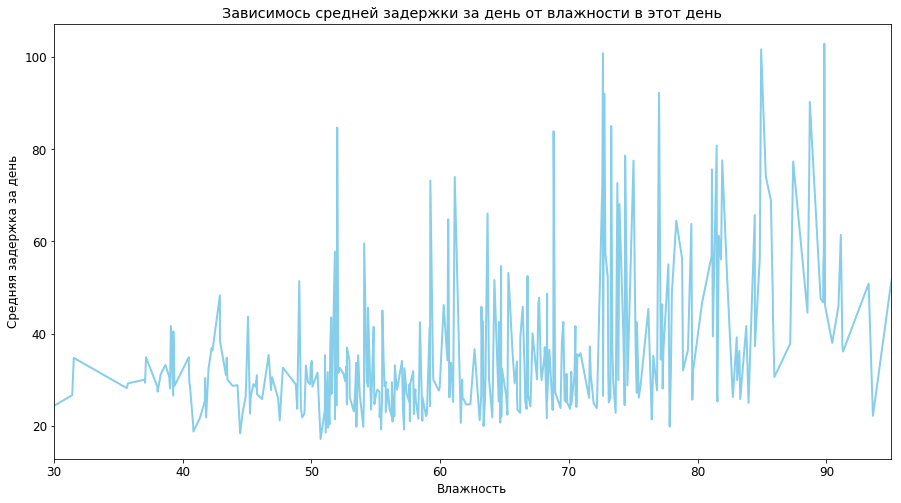

In [175]:
dH = dw[['humid', 'year' ,'month','day']]
dH = dH.groupby([dH.year, dH.month , dH.day]).mean()
df15=dfNew[['dep_delay', 'year','month','day']]
df15 = df15[df15['dep_delay'] > 0]
df15 = df15.groupby([df15.year, df15.month, df15.day]).mean()

mt5 = pd.merge(df15, dH, on = ['year','month','day']).sort_values(by = 'humid')
A15 = np.array(mt5['dep_delay'])
b15 = np.array(mt5['humid'])
plt.figure(figsize = (15, 8))
plt.plot(b15, A15, lw = 2, color = 'skyblue')
plt.title('Зависимось средней задержки за день от влажности в этот день')
plt.xlabel('Влажность')
plt.ylabel('Средняя задержка за день')
plt.xlim(30, 95)
plt.show()

Вывод: Чем больше влажность, тем больше средняя задержка.

10. Зависимость среднего времени задержки от видимости:

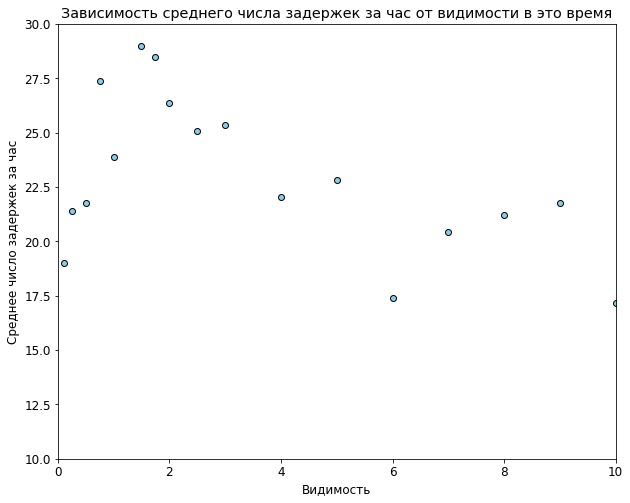

In [176]:
df11=dfNew[['dep_delay', 'year','month','day','hour']]
df11 = df11[df11['dep_delay'] > 0]
df11 = pd.DataFrame(df11.groupby([df11.year, df11.month, df11.day, df11.hour])['dep_delay'].size().reset_index(name='Count'))
df1_3 = dw[['visib', 'year' ,'month', 'day', 'hour']]
df1_3 = df1_3.groupby([df1_3.year, df1_3.month , df1_3.day, df1_3.hour]).mean()
df11.head()
df1_3.head(20)
mt3 = pd.merge(df11, df1_3, on = ['year','month','day', 'hour'])
mt3 = mt3.groupby(mt3.visib).mean()
amt3 = np.array(mt3['Count'])
bmt3 = np.array(mt3['visib'])
plt.figure(figsize = (10, 8))
plt.scatter(bmt3, amt3, color = 'skyblue', edgecolor = 'black')
plt.xlim(0, 10)
plt.ylim(10, 30)
plt.ylabel('Среднее число задержек за час')
plt.xlabel('Видимость')
plt.title('Зависимость среднего числа задержек за час от видимости в это время')
plt.show()

Вывод: При увеличении видимости средняя задержка уменьшается.